In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [15]:
!pip install lxml

Step 1: Uploading data for Glendale Zipcode

In [16]:
df_cities = pd.read_csv ('uszips.csv')
df_cities.head()
#load and create dataframe 

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,41520,523.5,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,29016,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


In [17]:
df_ca= df_cities[df_cities['state_id'] == 'CA'].reset_index(drop=True)
#Remove all states except California

In [18]:
df_glendale=df_ca[df_ca['city']=='Glendale'].reset_index(drop=True)
#Only include zipcodes classified as Glendale

In [19]:
df_Glendale = df_glendale[['population','lat','lng','zip']].reset_index(drop=True)
df_Glendale.head(10)
#clean database

,population,lat,lng,zip
0,22781,34.17031,-118.28913,91201
1,22830,34.16784,-118.26844,91202
2,13220,34.15296,-118.26425,91203
3,16032,34.13636,-118.26098,91204
4,37810,34.13666,-118.24332,91205
5,33065,34.16068,-118.21352,91206
6,10506,34.18361,-118.25864,91207
7,16245,34.19251,-118.23657,91208
8,328,34.14454,-118.25650,91210


In [20]:
df_Glendale.shape

(9, 4)

In [21]:
df_Glendale.columns = ['population', 'lat', 'lng', 'postalCode']
df_Glendale.head()
#Change Column Names


,population,lat,lng,postalCode
0,22781,34.17031,-118.28913,91201
1,22830,34.16784,-118.26844,91202
2,13220,34.15296,-118.26425,91203
3,16032,34.13636,-118.26098,91204
4,37810,34.13666,-118.24332,91205


%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
df_Glendale.set_index('lat', inplace=True)


In [24]:
df_Glendale.head(10)

,population,lng,postalCode
lat,,,
34.17031,22781,-118.28913,91201
34.16784,22830,-118.26844,91202
34.15296,13220,-118.26425,91203
34.13636,16032,-118.26098,91204
34.13666,37810,-118.24332,91205
34.16068,33065,-118.21352,91206
34.18361,10506,-118.25864,91207
34.19251,16245,-118.23657,91208
34.14454,328,-118.25650,91210


Step 2: Gather Glendale Venue data from Foursquare API

In [25]:
address = 'Glendale, California'

geolocator = Nominatim(user_agent="glendale_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Glendale are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Glendale are 34.142498, -118.248596.


In [26]:
CLIENT_ID = 'BP44YDETJOHTOFCOXME4ZJH2MQK2ELI4FCNHVFOBUNLUWJ1W' # your Foursquare ID
CLIENT_SECRET = 'NTOSISJMJWWCICF2IJAVCJVPTS1NUZLXYK1AC0YR1Y31AS3I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BP44YDETJOHTOFCOXME4ZJH2MQK2ELI4FCNHVFOBUNLUWJ1W
CLIENT_SECRET:NTOSISJMJWWCICF2IJAVCJVPTS1NUZLXYK1AC0YR1Y31AS3I


Create and clean dataframe for search query 'Italian':

In [27]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')


Italian .... OK!


In [28]:

LIMIT= 250
radius= 8046.72
url_italian = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


In [29]:
results_italian = requests.get(url_italian).json()
results_italian





{'meta': {'code': 200, 'requestId': '5db35f7b89b06a002c43efb8'},
 'response': {'venues': [{'id': '4ad8cf8ff964a520e01421e3',
    'name': "Mario's Italian Deli & Market",
    'location': {'address': '740 E Broadway',
     'crossStreet': 'at Everett St',
     'lat': 34.14620094595926,
     'lng': -118.2457651909672,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.14620094595926,
       'lng': -118.2457651909672}],
     'distance': 487,
     'postalCode': '91205',
     'cc': 'US',
     'city': 'Glendale',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['740 E Broadway (at Everett St)',
      'Glendale, CA 91205',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId':

In [30]:
italianvenues = results_italian['response']['venues']

# tranform venues into a dataframe
df_italian = json_normalize(italianvenues)
df_italian.head()







,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4ad8cf8ff964a520e01421e3,Mario's Italian Deli & Market,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1572036475,False,740 E Broadway,at Everett St,34.146201,-118.245765,"[{'label': 'display', 'lat': 34.14620094595926...",...,CA,United States,"[740 E Broadway (at Everett St), Glendale, CA ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b521874f964a520696727e3,L.A. Italian Kitchen,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1572036475,False,1127 Glendale Galleria,Glendale Galleria Food Court,34.145079,-118.258964,"[{'label': 'display', 'lat': 34.14507875797290...",...,CA,United States,[1127 Glendale Galleria (Glendale Galleria Foo...,1107896,https://www.grubhub.com/restaurant/la-italian-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
2,4c5b1edf5c57c9b6e5fb1e4a,Deluca's Italian Deli,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1572036475,False,781 Americana Way,at Americana At Brand,34.143573,-118.256067,"[{'label': 'display', 'lat': 34.14357309601432...",...,CA,United States,"[781 Americana Way (at Americana At Brand), Gl...",1158989,https://www.grubhub.com/restaurant/delucas-ita...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,4be77275d837c9b6d64da406,Scarantino's Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1572036475,False,1524 E Colorado St,NaN,34.142639,-118.230478,"[{'label': 'display', 'lat': 34.14263859816085...",...,CA,United States,"[1524 E Colorado St, Glendale, CA 91205, Unite...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,561c1413498ef927de580783,Italian Custom Upholstry,"[{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...",v-1572036475,False,102 1/2 S Glendale Ave,Broadway,34.145941,-118.247205,"[{'label': 'display', 'lat': 34.145941, 'lng':...",...,CA,United States,"[102 1/2 S Glendale Ave (Broadway), Glendale, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_italian.columns if col.startswith('location.')] + ['id']
df_italian_filtered = df_italian.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_italian_filtered['categories'] = df_italian_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_italian_filtered.columns = [column.split('.')[-1] for column in df_italian_filtered.columns]

df_italian_filtered





,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Mario's Italian Deli & Market,Italian Restaurant,740 E Broadway,at Everett St,34.146201,-118.245765,"[{'label': 'display', 'lat': 34.14620094595926...",487,91205,US,Glendale,CA,United States,"[740 E Broadway (at Everett St), Glendale, CA ...",4ad8cf8ff964a520e01421e3
1,L.A. Italian Kitchen,Pizza Place,1127 Glendale Galleria,Glendale Galleria Food Court,34.145079,-118.258964,"[{'label': 'display', 'lat': 34.14507875797290...",997,91210,US,Glendale,CA,United States,[1127 Glendale Galleria (Glendale Galleria Foo...,4b521874f964a520696727e3
2,Deluca's Italian Deli,Italian Restaurant,781 Americana Way,at Americana At Brand,34.143573,-118.256067,"[{'label': 'display', 'lat': 34.14357309601432...",698,91210,US,Glendale,CA,United States,"[781 Americana Way (at Americana At Brand), Gl...",4c5b1edf5c57c9b6e5fb1e4a
3,Scarantino's Italian Restaurant,Italian Restaurant,1524 E Colorado St,NaN,34.142639,-118.230478,"[{'label': 'display', 'lat': 34.14263859816085...",1669,91205,US,Glendale,CA,United States,"[1524 E Colorado St, Glendale, CA 91205, Unite...",4be77275d837c9b6d64da406
4,Italian Custom Upholstry,Furniture / Home Store,102 1/2 S Glendale Ave,Broadway,34.145941,-118.247205,"[{'label': 'display', 'lat': 34.145941, 'lng':...",404,91205,US,Glendale,CA,United States,"[102 1/2 S Glendale Ave (Broadway), Glendale, ...",561c1413498ef927de580783
5,Colombo's Italian Steakhouse and Jazz Club,Italian Restaurant,1833 Colorado Blvd,at Hermosa Ave.,34.139489,-118.207269,"[{'label': 'display', 'lat': 34.13948934682296...",3822,90041,US,Los Angeles,CA,United States,"[1833 Colorado Blvd (at Hermosa Ave.), Los Ang...",4a7ac0bbf964a52075e91fe3
6,Fresco Italian Restaurant,Italian Restaurant,514 S Brand Blvd,NaN,34.139970,-118.254803,"[{'label': 'display', 'lat': 34.13997, 'lng': ...",637,91204,US,Glendale,CA,United States,"[514 S Brand Blvd, Glendale, CA 91204, United ...",4c7acfe7794e224bffcd6928
7,Maurizio's Italian Kitchen and Bar,Food,135 N Maryland Ave,NaN,34.147202,-118.253998,"[{'label': 'display', 'lat': 34.147202, 'lng':...",722,91206,US,Glendale,CA,United States,"[135 N Maryland Ave, Glendale, CA 91206, Unite...",4f324da019836c91c7ca6bbd
8,Romolo's Italian Cuisine,Food Truck,Moving Target!!,NaN,34.156882,-118.331775,"[{'label': 'display', 'lat': 34.1568816214144,...",7828,91607,US,Los Angeles,CA,United States,"[Moving Target!!, Los Angeles, CA 91607, Unite...",4f8339dde4b0fdf503f59853
9,Olive Garden,Italian Restaurant,101 N Brand Blvd,btwn Wilson & Broadway,34.147288,-118.255310,"[{'label': 'display', 'lat': 34.14728815485925...",816,91203,US,Glendale,CA,United States,"[101 N Brand Blvd (btwn Wilson & Broadway), Gl...",4a9dc82df964a5205f3920e3


In [32]:
df_Italian_filtered=df_italian_filtered[df_italian_filtered['city']=='Glendale'].reset_index(drop=True)
df_Italian_filtered['type']='Italian'
df_Italian_filtered.head()
#limit venues only to those officially located in Glendale 



,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type
0,Mario's Italian Deli & Market,Italian Restaurant,740 E Broadway,at Everett St,34.146201,-118.245765,"[{'label': 'display', 'lat': 34.14620094595926...",487,91205,US,Glendale,CA,United States,"[740 E Broadway (at Everett St), Glendale, CA ...",4ad8cf8ff964a520e01421e3,Italian
1,L.A. Italian Kitchen,Pizza Place,1127 Glendale Galleria,Glendale Galleria Food Court,34.145079,-118.258964,"[{'label': 'display', 'lat': 34.14507875797290...",997,91210,US,Glendale,CA,United States,[1127 Glendale Galleria (Glendale Galleria Foo...,4b521874f964a520696727e3,Italian
2,Deluca's Italian Deli,Italian Restaurant,781 Americana Way,at Americana At Brand,34.143573,-118.256067,"[{'label': 'display', 'lat': 34.14357309601432...",698,91210,US,Glendale,CA,United States,"[781 Americana Way (at Americana At Brand), Gl...",4c5b1edf5c57c9b6e5fb1e4a,Italian
3,Scarantino's Italian Restaurant,Italian Restaurant,1524 E Colorado St,NaN,34.142639,-118.230478,"[{'label': 'display', 'lat': 34.14263859816085...",1669,91205,US,Glendale,CA,United States,"[1524 E Colorado St, Glendale, CA 91205, Unite...",4be77275d837c9b6d64da406,Italian
4,Italian Custom Upholstry,Furniture / Home Store,102 1/2 S Glendale Ave,Broadway,34.145941,-118.247205,"[{'label': 'display', 'lat': 34.145941, 'lng':...",404,91205,US,Glendale,CA,United States,"[102 1/2 S Glendale Ave (Broadway), Glendale, ...",561c1413498ef927de580783,Italian


In [33]:
df_Italian_filtered.shape

(11, 16)

There are 11 Venues with the search query 'italian' 

Create and Clean dataframe for search query Thai

In [34]:
search_query1 = 'Thai'
radius = 500
print(search_query1 + ' .... OK!')



Thai .... OK!


In [35]:

LIMIT= 250
radius= 8046.72
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query1, radius, LIMIT)

url1


'https://api.foursquare.com/v2/venues/search?client_id=BP44YDETJOHTOFCOXME4ZJH2MQK2ELI4FCNHVFOBUNLUWJ1W&client_secret=NTOSISJMJWWCICF2IJAVCJVPTS1NUZLXYK1AC0YR1Y31AS3I&ll=34.142498,-118.248596&v=20180605&query=Thai&radius=8046.72&limit=250'

In [36]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5db35f7f6adbf5002ca0bc8b'},
 'response': {'venues': [{'id': '4b80b8d0f964a520638830e3',
    'name': 'Thai Original BBQ',
    'location': {'address': '143 S Glendale Ave',
     'crossStreet': 'at E Harvard St',
     'lat': 34.14482474014045,
     'lng': -118.24795794337203,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.14482474014045,
       'lng': -118.24795794337203}],
     'distance': 265,
     'postalCode': '91205',
     'cc': 'US',
     'city': 'Glendale',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['143 S Glendale Ave (at E Harvard St)',
      'Glendale, CA 91205',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d149941735',
      'name': 'Thai Restaurant',
      'pluralName': 'Thai Restaurants',
      'shortName': 'Thai',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-157203

In [37]:
Thaivenues = results1['response']['venues']

# tranform venues into a dataframe
df_thai = json_normalize(Thaivenues)
df_thai.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4b80b8d0f964a520638830e3,Thai Original BBQ,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1572036479,False,143 S Glendale Ave,at E Harvard St,34.144825,-118.247958,"[{'label': 'display', 'lat': 34.14482474014045...",...,CA,United States,"[143 S Glendale Ave (at E Harvard St), Glendal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b567a4af964a520381228e3,Indra Thai Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1572036479,False,517 S Verdugo Rd,Maple St,34.140041,-118.233929,"[{'label': 'display', 'lat': 34.14004056879811...",...,CA,United States,"[517 S Verdugo Rd (Maple St), Glendale, CA 912...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bbb8f0c51b89c74875e862a,Thai Food Grill,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1572036479,False,1357 E Colorado St,at Griswold St,34.142897,-118.235104,"[{'label': 'display', 'lat': 34.14289661666667...",...,CA,United States,"[1357 E Colorado St (at Griswold St), Glendale...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ae7cc7df964a520aead21e3,Thai Spirit,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1572036479,False,2617 Colorado Blvd,NaN,34.142690,-118.223300,"[{'label': 'display', 'lat': 34.14268966946287...",...,CA,United States,"[2617 Colorado Blvd, Los Angeles, CA 90041, Un...",79526,https://www.grubhub.com/restaurant/thai-spirit...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
4,4a33366ff964a520179b1fe3,Jitlada Thai Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1572036479,False,5233 W Sunset Blvd,NaN,34.098550,-118.304094,"[{'label': 'display', 'lat': 34.09855044350039...",...,CA,United States,"[5233 W Sunset Blvd, Los Angeles, CA 90027, Un...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_thai.columns if col.startswith('location.')] + ['id']
df_thai_filtered = df_thai.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_thai_filtered['categories'] = df_thai_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_thai_filtered.columns = [column.split('.')[-1] for column in df_thai_filtered.columns]

df_thai_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Thai Original BBQ,Thai Restaurant,143 S Glendale Ave,at E Harvard St,34.144825,-118.247958,"[{'label': 'display', 'lat': 34.14482474014045...",265,91205,US,Glendale,CA,United States,"[143 S Glendale Ave (at E Harvard St), Glendal...",4b80b8d0f964a520638830e3
1,Indra Thai Restaurant,Thai Restaurant,517 S Verdugo Rd,Maple St,34.140041,-118.233929,"[{'label': 'display', 'lat': 34.14004056879811...",1378,91205,US,Glendale,CA,United States,"[517 S Verdugo Rd (Maple St), Glendale, CA 912...",4b567a4af964a520381228e3
2,Thai Food Grill,Thai Restaurant,1357 E Colorado St,at Griswold St,34.142897,-118.235104,"[{'label': 'display', 'lat': 34.14289661666667...",1243,91205,US,Glendale,CA,United States,"[1357 E Colorado St (at Griswold St), Glendale...",4bbb8f0c51b89c74875e862a
3,Thai Spirit,Thai Restaurant,2617 Colorado Blvd,NaN,34.142690,-118.223300,"[{'label': 'display', 'lat': 34.14268966946287...",2330,90041,US,Los Angeles,CA,United States,"[2617 Colorado Blvd, Los Angeles, CA 90041, Un...",4ae7cc7df964a520aead21e3
4,Jitlada Thai Restaurant,Thai Restaurant,5233 W Sunset Blvd,NaN,34.098550,-118.304094,"[{'label': 'display', 'lat': 34.09855044350039...",7077,90027,US,Los Angeles,CA,United States,"[5233 W Sunset Blvd, Los Angeles, CA 90027, Un...",4a33366ff964a520179b1fe3
5,Thai Hut,Japanese Restaurant,104 N Glendale Ave,NaN,34.146796,-118.246783,"[{'label': 'display', 'lat': 34.14679587746693...",506,91206,US,Glendale,CA,United States,"[104 N Glendale Ave, Glendale, CA 91206, Unite...",5a55049da9fe1240ab9f8c88
6,Palms Thai Restaurant,Thai Restaurant,5900 Hollywood Blvd Ste B,at N Bronson Ave,34.101700,-118.318178,"[{'label': 'display', 'lat': 34.10170009076605...",7857,90028,US,Los Angeles,CA,United States,"[5900 Hollywood Blvd Ste B (at N Bronson Ave),...",472a9afcf964a520ec4b1fe3
7,Ruen Pair Thai Restaurant,Thai Restaurant,5257 Hollywood Blvd,at N Hobart Blvd,34.102035,-118.305604,"[{'label': 'display', 'lat': 34.10203547642684...",6920,90027,US,Los Angeles,CA,United States,"[5257 Hollywood Blvd (at N Hobart Blvd), Los A...",4ad930fcf964a520f61821e3
8,Tep Thai,Thai Restaurant,209 W Wilson Ave,at Orange St.,34.148066,-118.256894,"[{'label': 'display', 'lat': 34.14806611952763...",984,91203,US,Glendale,CA,United States,"[209 W Wilson Ave (at Orange St.), Glendale, C...",4b609f41f964a520c8f029e3
9,Eagle Rock Thai Spa,Spa,2501 Colorado Blvd #A,College View Ave.,34.141720,-118.221093,"[{'label': 'display', 'lat': 34.14171995341036...",2535,90041,US,Los Angeles,CA,United States,"[2501 Colorado Blvd #A (College View Ave.), Lo...",4c3b6b354565e21e0ab2566a


In [39]:
df_Thai_filtered=df_thai_filtered[df_thai_filtered['city']=='Glendale'].reset_index(drop=True)
df_Thai_filtered['type']='Thai'

df_Thai_filtered.head()
#include only venues officially located in glendale


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type
0,Thai Original BBQ,Thai Restaurant,143 S Glendale Ave,at E Harvard St,34.144825,-118.247958,"[{'label': 'display', 'lat': 34.14482474014045...",265,91205,US,Glendale,CA,United States,"[143 S Glendale Ave (at E Harvard St), Glendal...",4b80b8d0f964a520638830e3,Thai
1,Indra Thai Restaurant,Thai Restaurant,517 S Verdugo Rd,Maple St,34.140041,-118.233929,"[{'label': 'display', 'lat': 34.14004056879811...",1378,91205,US,Glendale,CA,United States,"[517 S Verdugo Rd (Maple St), Glendale, CA 912...",4b567a4af964a520381228e3,Thai
2,Thai Food Grill,Thai Restaurant,1357 E Colorado St,at Griswold St,34.142897,-118.235104,"[{'label': 'display', 'lat': 34.14289661666667...",1243,91205,US,Glendale,CA,United States,"[1357 E Colorado St (at Griswold St), Glendale...",4bbb8f0c51b89c74875e862a,Thai
3,Thai Hut,Japanese Restaurant,104 N Glendale Ave,NaN,34.146796,-118.246783,"[{'label': 'display', 'lat': 34.14679587746693...",506,91206,US,Glendale,CA,United States,"[104 N Glendale Ave, Glendale, CA 91206, Unite...",5a55049da9fe1240ab9f8c88,Thai
4,Tep Thai,Thai Restaurant,209 W Wilson Ave,at Orange St.,34.148066,-118.256894,"[{'label': 'display', 'lat': 34.14806611952763...",984,91203,US,Glendale,CA,United States,"[209 W Wilson Ave (at Orange St.), Glendale, C...",4b609f41f964a520c8f029e3,Thai


In [40]:
df_Thai_filtered.shape

(15, 16)

There are 15 venues for search quory Thai 

Create and Clean Dataframe for search query mexican:

In [41]:
search_query = 'Mexican'
radius = 8046.72
print(search_query + ' .... OK!')

Mexican .... OK!


In [42]:
LIMIT= 250
radius= 8046.72
url_mexican = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


In [43]:
results_mexican = requests.get(url_mexican).json()
results_mexican


{'meta': {'code': 200, 'requestId': '5db35f82c58ed7002ccf7b2b'},
 'response': {'venues': [{'id': '4bad81b9f964a52073573be3',
    'name': 'Frida Mexican Restaurant',
    'location': {'address': '750 Americana Way',
     'crossStreet': 'The American at Brand',
     'lat': 34.1441507,
     'lng': -118.2552974,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.1441507,
       'lng': -118.2552974}],
     'distance': 644,
     'postalCode': '91210',
     'cc': 'US',
     'city': 'Glendale',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['750 Americana Way (The American at Brand)',
      'Glendale, CA 91210',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1c1941735',
      'name': 'Mexican Restaurant',
      'pluralName': 'Mexican Restaurants',
      'shortName': 'Mexican',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '34

In [44]:
mexicanvenues = results_mexican['response']['venues']

# tranform venues into a dataframe
df_mexican = json_normalize(mexicanvenues)
df_mexican.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,4bad81b9f964a52073573be3,Frida Mexican Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1572036482,False,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",...,United States,"[750 Americana Way (The American at Brand), Gl...",343691,https://www.grubhub.com/restaurant/frida-mexic...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,64747666,NaN
1,4b8214a2f964a520fbc930e3,Barragan's Mexican Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1572036482,False,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",...,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4a91b6ccf964a5207f1b20e3,Acapulco Mexican Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1572036482,False,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",...,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",863965,https://www.grubhub.com/restaurant/acapulco-me...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,4ab41217f964a520b86f20e3,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1572036482,False,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",...,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55b40cad498edddae42f7ac3,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1572036482,False,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",...,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_mexican_filtered = df_mexican.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_mexican_filtered['categories'] = df_mexican_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_mexican_filtered.columns = [column.split('.')[-1] for column in df_mexican_filtered.columns]
df_mexican_filtered


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3
4,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3
5,Chipotle Mexican Grill,Mexican Restaurant,1460 Vine St,at W Sunset Blvd,34.097347,-118.326366,"[{'label': 'display', 'lat': 34.09734687431174...",8753,90028,US,Los Angeles,CA,United States,"[1460 Vine St (at W Sunset Blvd), Los Angeles,...",4c13aef57f7f2d7fe271df68
6,Chipotle Mexican Grill,Mexican Restaurant,"1135 Glendale Galleria, Suite FC-12",W Broadway & S Brand,34.145124,-118.259326,"[{'label': 'display', 'lat': 34.145124, 'lng':...",1030,91210,US,Glendale,CA,United States,"[1135 Glendale Galleria, Suite FC-12 (W Broadw...",53befc30498e246c7d0d23cc
7,Sharky's Woodfired Mexican Grill,Mexican Restaurant,1716 N Cahuenga Blvd,at Hollywood Blvd.,34.102222,-118.329429,"[{'label': 'display', 'lat': 34.10222155076494...",8694,90028,US,Los Angeles,CA,United States,"[1716 N Cahuenga Blvd (at Hollywood Blvd.), Lo...",4b04b9fef964a5205c5622e3
8,Cactus Mexican Food,Mexican Restaurant,4370 Beverly Blvd,NaN,34.076194,-118.304147,"[{'label': 'display', 'lat': 34.07619402541974...",8982,90004,US,Los Angeles,CA,United States,"[4370 Beverly Blvd, Los Angeles, CA 90004, Uni...",49e8c872f964a5207c651fe3
9,Viva Cantina Mexican Restaurant,Mexican Restaurant,900 W Riverside Dr,S. Main St.,34.160710,-118.310628,"[{'label': 'display', 'lat': 34.16071033697309...",6063,91506,US,Burbank,CA,United States,"[900 W Riverside Dr (S. Main St.), Burbank, CA...",422e3c80f964a520f71f1fe3


In [46]:

df_Mexican_filtered=df_mexican_filtered[df_mexican_filtered['city']=='Glendale'].reset_index(drop=True)
df_Mexican_filtered['type']='Mexican'

df_Mexican_filtered.head()



,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican
4,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican


In [47]:
df_Mexican_filtered.shape

(11, 16)

There are 11 venues with the search query Mexican

Combine dataframes

In [48]:
df_combined = pd.concat([df_Mexican_filtered,df_Italian_filtered, df_Thai_filtered], axis=0)
df_combined

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican
4,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican
5,Chipotle Mexican Grill,Mexican Restaurant,"1135 Glendale Galleria, Suite FC-12",W Broadway & S Brand,34.145124,-118.259326,"[{'label': 'display', 'lat': 34.145124, 'lng':...",1030,91210,US,Glendale,CA,United States,"[1135 Glendale Galleria, Suite FC-12 (W Broadw...",53befc30498e246c7d0d23cc,Mexican
6,Taco Azteca Mexican Food,Food,1428 E Colorado St,NaN,34.142768,-118.231840,"[{'label': 'display', 'lat': 34.142768, 'lng':...",1544,91205,US,Glendale,CA,United States,"[1428 E Colorado St, Glendale, CA 91205, Unite...",4f325d8d19836c91c7d0a389,Mexican
7,Rubio's Coastal Grill,Seafood Restaurant,"249 N. Glendale Avenue, Suite B",at E California Ave,34.149758,-118.246092,"[{'label': 'display', 'lat': 34.149758, 'lng':...",840,91206,US,Glendale,CA,United States,"[249 N. Glendale Avenue, Suite B (at E Califor...",4a7b47daf964a5208eea1fe3,Mexican
8,Mi Corazon Mexican Restaurant,Mexican Restaurant,1402 W Kenneth Rd,NaN,34.172521,-118.279397,"[{'label': 'display', 'lat': 34.17252126605702...",4384,91201,US,Glendale,CA,United States,"[1402 W Kenneth Rd, Glendale, CA 91201, United...",506c928de4b03bdbe5c1999b,Mexican
9,Ara's Tacos Mexican Grill,Taco Place,901 Glenoaks Blvd,at Highland Ave,34.161286,-118.274890,"[{'label': 'display', 'lat': 34.16128578166390...",3200,91201,US,Glendale,CA,United States,"[901 Glenoaks Blvd (at Highland Ave), Glendale...",512fbacae4b0b6aec4b2af7c,Mexican


In [49]:
df_combined.shape

(37, 16)

There are 38 combined venues

Step 3: Analyze number of venues in each zipcode and venue ratings

In [50]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()
#upload ratings file

,name,rankings
0,Frida Mexican Restaurant,7.2
1,Acapulco Mexican Restaurant,8.4
2,Chipotle Mexican Grill,7.6
3,Mi Corazon Mexican Restaurant,7.9
4,Barragan's Mexican Restaurant,6.8


In [51]:
df_combined2=pd.merge(df_combined, df_ratings, on='name', how='outer')
df_combined2.head(50)
#combine ratings dataframe with combined dataframe

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type,rankings
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644.0,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican,7.2
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109.0,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican,6.8
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139.0,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican,8.4
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,7.6
4,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,6.2
5,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,6.8
6,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,7.6
7,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,6.2
8,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,6.8
9,Chipotle Mexican Grill,Mexican Restaurant,"1135 Glendale Galleria, Suite FC-12",W Broadway & S Brand,34.145124,-118.259326,"[{'label': 'display', 'lat': 34.145124, 'lng':...",1030.0,91210,US,Glendale,CA,United States,"[1135 Glendale Galleria, Suite FC-12 (W Broadw...",53befc30498e246c7d0d23cc,Mexican,7.6


In [52]:
df_ratings.head()

,name,rankings
0,Frida Mexican Restaurant,7.2
1,Acapulco Mexican Restaurant,8.4
2,Chipotle Mexican Grill,7.6
3,Mi Corazon Mexican Restaurant,7.9
4,Barragan's Mexican Restaurant,6.8


In [53]:
df_combined2.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type,rankings
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644.0,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican,7.2
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109.0,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican,6.8
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139.0,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican,8.4
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,7.6
4,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,6.2


In [54]:

df_combined2 = df_combined2.drop_duplicates(subset='address', keep='first')
#drop duplicate venues 

In [55]:

df_combined2.shape
df_combined2.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type,rankings
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644.0,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican,7.2
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109.0,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican,6.8
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139.0,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican,8.4
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,7.6
6,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,7.6


In [56]:
df_combined_filteredtype=df_combined2


In [57]:
df_combined_filteredtype['count'] = df_combined_filteredtype.groupby('type')['type'].transform('count')
df_combined_filteredtype.groupby('type')['type']
df_combined_filteredtype
#add counts per venue type

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type,rankings,count
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644.0,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican,7.2,11
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109.0,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican,6.8,11
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139.0,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican,8.4,11
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,7.6,11
6,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,7.6,11
9,Chipotle Mexican Grill,Mexican Restaurant,"1135 Glendale Galleria, Suite FC-12",W Broadway & S Brand,34.145124,-118.259326,"[{'label': 'display', 'lat': 34.145124, 'lng':...",1030.0,91210,US,Glendale,CA,United States,"[1135 Glendale Galleria, Suite FC-12 (W Broadw...",53befc30498e246c7d0d23cc,Mexican,7.6,11
12,Taco Azteca Mexican Food,Food,1428 E Colorado St,NaN,34.142768,-118.231840,"[{'label': 'display', 'lat': 34.142768, 'lng':...",1544.0,91205,US,Glendale,CA,United States,"[1428 E Colorado St, Glendale, CA 91205, Unite...",4f325d8d19836c91c7d0a389,Mexican,8.5,11
13,Rubio's Coastal Grill,Seafood Restaurant,"249 N. Glendale Avenue, Suite B",at E California Ave,34.149758,-118.246092,"[{'label': 'display', 'lat': 34.149758, 'lng':...",840.0,91206,US,Glendale,CA,United States,"[249 N. Glendale Avenue, Suite B (at E Califor...",4a7b47daf964a5208eea1fe3,Mexican,7,11
14,Mi Corazon Mexican Restaurant,Mexican Restaurant,1402 W Kenneth Rd,NaN,34.172521,-118.279397,"[{'label': 'display', 'lat': 34.17252126605702...",4384.0,91201,US,Glendale,CA,United States,"[1402 W Kenneth Rd, Glendale, CA 91201, United...",506c928de4b03bdbe5c1999b,Mexican,7.9,11
15,Ara's Tacos Mexican Grill,Taco Place,901 Glenoaks Blvd,at Highland Ave,34.161286,-118.274890,"[{'label': 'display', 'lat': 34.16128578166390...",3200.0,91201,US,Glendale,CA,United States,"[901 Glenoaks Blvd (at Highland Ave), Glendale...",512fbacae4b0b6aec4b2af7c,Mexican,7.2,11


In [58]:

df_combined_filteredtype2 = df_combined_filteredtype[['type','count']]
df_combined_filteredtype2.reset_index(drop=True)
#clean data

,type,count
0,Mexican,11
1,Mexican,11
2,Mexican,11
3,Mexican,11
4,Mexican,11
5,Mexican,11
6,Mexican,11
7,Mexican,11
8,Mexican,11
9,Mexican,11


In [59]:
df_combined_filteredtype2 = df_combined_filteredtype2.drop_duplicates(subset='type', keep='first')


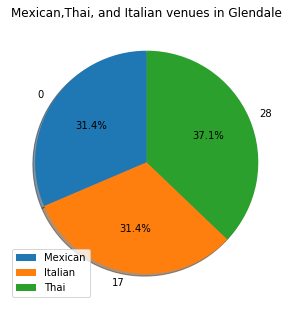

In [60]:
df_combined_filteredtype2['count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,        
                            )
labels = ['Mexican', 'Italian','Thai']

plt.title('Mexican,Thai, and Italian venues in Glendale')
plt.axis('off') # Sets the pie chart to look like a circle.
plt.legend(labels,loc=3)
plt.show()

#create pie chart 

In [61]:
df_rankings = df_combined2[['name','postalCode','rankings','type',]].reset_index(drop=True)
df_rankings.head()


,name,postalCode,rankings,type
0,Frida Mexican Restaurant,91210,7.2,Mexican
1,Barragan's Mexican Restaurant,91204,6.8,Mexican
2,Acapulco Mexican Restaurant,91203,8.4,Mexican
3,Chipotle Mexican Grill,91206,7.6,Mexican
4,Chipotle Mexican Grill,91203,7.6,Mexican


In [62]:
my_list = df_rankings["rankings"].values
my_list


array(['7.2', '6.8', '8.4', '7.6', '7.6', '7.6', '8.5', '7', '7.9', '7.2',
       'na', '8.3', 'na', '6.7', '6.3', 'na', 'na', 'na', '6.7', 'na',
       'na', 'na', '7.3', '7.9', 'na', nan, '6.5', 'na', '7.3', 'na',
       '7.2', 'na', '6.5', '6.4', 'na'], dtype=object)

In [63]:

df_rankings = df_rankings[df_rankings.rankings != 'na']
df_rankings = df_rankings[df_rankings.rankings != 'nan']
df_rankings.rankings=df_rankings.rankings.astype(float)
#drop null values

In [64]:
overall_average=df_rankings["rankings"].mean()
overall_average
df_ratings_italian= df_rankings[df_rankings['type'] == 'Italian'].reset_index(drop=True)
df_ratings_italian = df_ratings_italian[['name','postalCode','rankings',]].reset_index(drop=True)
italian_average=df_ratings_italian["rankings"].mean()
italian_average
df_ratings_thai= df_rankings[df_rankings['type'] == 'Thai'].reset_index(drop=True)
df_ratings_thai = df_ratings_thai[['name','postalCode','rankings',]].reset_index(drop=True)
thai_average=df_ratings_thai["rankings"].mean()
thai_average
df_ratings_mexican= df_rankings[df_rankings['type'] == 'Mexican'].reset_index(drop=True)
df_ratings_mexican = df_ratings_mexican[['name','postalCode','rankings',]].reset_index(drop=True)
mexican_average=df_ratings_mexican["rankings"].mean()
mexican_average
#get overall average ratings and ratings for each type of resturant 


7.580000000000001

In [65]:
d = {'type': ['Italian', 'Thai', 'Mexican'], 'avg ratings': [italian_average,thai_average,mexican_average]}
df_averages = pd.DataFrame(data=d)
df_averages.set_index('type',drop=True,inplace=True)
df_averages
#list averages

,avg ratings
type,
Italian,7.000000
Thai,7.014286
Mexican,7.580000


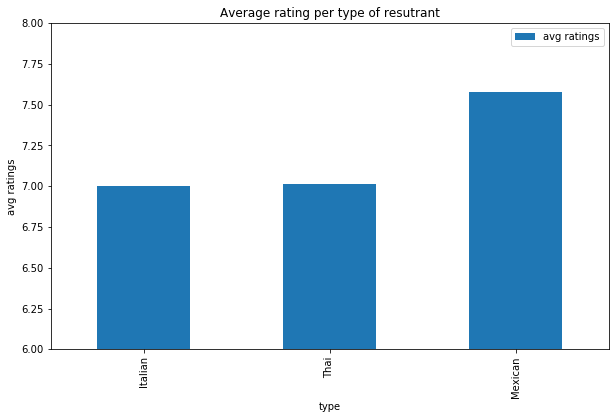

In [66]:
df_averages.plot(kind='bar', figsize=(10, 6))
plt.ylim(6, 8)
plt.xlabel('type') # add to x-label to the plot
plt.ylabel('avg ratings') # add y-label to the plot
plt.title('Average rating per type of resutrant') # add title to the plot

plt.show()
#create graph showing average ratings per type of resturant 

In [67]:
df_combined_filteredzip=df_combined2
df_combined_filteredzip['countzip'] = df_combined_filteredzip.groupby('postalCode')['postalCode'].transform('count')
df_combined_filteredzip.groupby('postalCode')['postalCode']
df_combined_filteredzip
#create dataframe and count venues in each zipcode

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,type,rankings,count,countzip
0,Frida Mexican Restaurant,Mexican Restaurant,750 Americana Way,The American at Brand,34.144151,-118.255297,"[{'label': 'display', 'lat': 34.1441507, 'lng'...",644.0,91210,US,Glendale,CA,United States,"[750 Americana Way (The American at Brand), Gl...",4bad81b9f964a52073573be3,Mexican,7.2,11,5.0
1,Barragan's Mexican Restaurant,Mexican Restaurant,814 S Central Ave,btw Garfield & Windsor,34.136042,-118.257774,"[{'label': 'display', 'lat': 34.13604175633993...",1109.0,91204,US,Glendale,CA,United States,"[814 S Central Ave (btw Garfield & Windsor), G...",4b8214a2f964a520fbc930e3,Mexican,6.8,11,3.0
2,Acapulco Mexican Restaurant,Mexican Restaurant,722 N Pacific Ave,at 134 Fwy,34.157074,-118.263727,"[{'label': 'display', 'lat': 34.15707381010225...",2139.0,91203,US,Glendale,CA,United States,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,Mexican,8.4,11,8.0
3,Chipotle Mexican Grill,Mexican Restaurant,132 N Glendale Ave,NaN,34.147457,-118.246342,"[{'label': 'display', 'lat': 34.14745710452632...",589.0,91206,US,Glendale,CA,United States,"[132 N Glendale Ave, Glendale, CA 91206, Unite...",4ab41217f964a520b86f20e3,Mexican,7.6,11,4.0
6,Chipotle Mexican Grill,Mexican Restaurant,155 N Brand Blvd,NaN,34.147951,-118.255294,"[{'label': 'display', 'lat': 34.14795064352478...",865.0,91203,US,Glendale,CA,United States,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,Mexican,7.6,11,8.0
9,Chipotle Mexican Grill,Mexican Restaurant,"1135 Glendale Galleria, Suite FC-12",W Broadway & S Brand,34.145124,-118.259326,"[{'label': 'display', 'lat': 34.145124, 'lng':...",1030.0,91210,US,Glendale,CA,United States,"[1135 Glendale Galleria, Suite FC-12 (W Broadw...",53befc30498e246c7d0d23cc,Mexican,7.6,11,5.0
12,Taco Azteca Mexican Food,Food,1428 E Colorado St,NaN,34.142768,-118.231840,"[{'label': 'display', 'lat': 34.142768, 'lng':...",1544.0,91205,US,Glendale,CA,United States,"[1428 E Colorado St, Glendale, CA 91205, Unite...",4f325d8d19836c91c7d0a389,Mexican,8.5,11,9.0
13,Rubio's Coastal Grill,Seafood Restaurant,"249 N. Glendale Avenue, Suite B",at E California Ave,34.149758,-118.246092,"[{'label': 'display', 'lat': 34.149758, 'lng':...",840.0,91206,US,Glendale,CA,United States,"[249 N. Glendale Avenue, Suite B (at E Califor...",4a7b47daf964a5208eea1fe3,Mexican,7,11,4.0
14,Mi Corazon Mexican Restaurant,Mexican Restaurant,1402 W Kenneth Rd,NaN,34.172521,-118.279397,"[{'label': 'display', 'lat': 34.17252126605702...",4384.0,91201,US,Glendale,CA,United States,"[1402 W Kenneth Rd, Glendale, CA 91201, United...",506c928de4b03bdbe5c1999b,Mexican,7.9,11,4.0
15,Ara's Tacos Mexican Grill,Taco Place,901 Glenoaks Blvd,at Highland Ave,34.161286,-118.274890,"[{'label': 'display', 'lat': 34.16128578166390...",3200.0,91201,US,Glendale,CA,United States,"[901 Glenoaks Blvd (at Highland Ave), Glendale...",512fbacae4b0b6aec4b2af7c,Mexican,7.2,11,4.0


In [68]:

df_combined_filteredzip2 = df_combined_filteredzip[['postalCode','countzip']]
df_combined_filteredzip2.reset_index(drop=True)
df_combined_filteredzip2.head
df_combined_filteredzip2 = df_combined_filteredzip2.drop_duplicates(subset='postalCode', keep='first')

df_combined_filteredzip2.head(10)
#clean zipcode dataframe

,postalCode,countzip
0,91210,5.0
1,91204,3.0
2,91203,8.0
3,91206,4.0
12,91205,9.0
14,91201,4.0
33,NaN,NaN
41,91202,1.0


In [69]:

df_combined_filteredzip2= df_combined_filteredzip2[pd.notnull(df_combined_filteredzip2['countzip'])]
df_combined_filteredzip2.head(10)
#drop null values

,postalCode,countzip
0,91210,5.0
1,91204,3.0
2,91203,8.0
3,91206,4.0
12,91205,9.0
14,91201,4.0
41,91202,1.0


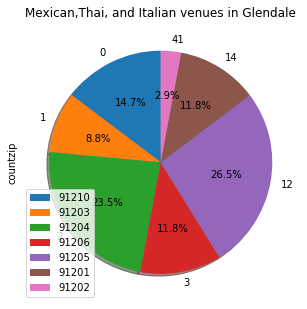

In [70]:

df_combined_filteredzip2['countzip'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       # add shadow      
                            )
labels = ['91210', '91203','91204','91206','91205','91201','91202']

plt.title('Mexican,Thai, and Italian venues in Glendale')
plt.axis('on')
plt.legend(labels,loc=3)
plt.show()

#create piechart for venues by zipcode


Step 4- combine original glendale dataframe and new zipcode dataframe to have population data

In [71]:
df_combined_filteredzip2=df_combined_filteredzip2.astype(float)
#convert values

In [72]:
df_Glendale=df_Glendale.astype(float)
df_Glendale.reset_index()
df_Glendale.head()
#convert values

,population,lng,postalCode
lat,,,
34.17031,22781.0,-118.28913,91201.0
34.16784,22830.0,-118.26844,91202.0
34.15296,13220.0,-118.26425,91203.0
34.13636,16032.0,-118.26098,91204.0
34.13666,37810.0,-118.24332,91205.0


In [73]:
df_glendale_combined= pd.merge(df_combined_filteredzip2, df_Glendale, on='postalCode', how='outer')
df_glendale_combined.head(10)
#combine zipcode dataframe with original glendale dataframe

,postalCode,countzip,population,lng
0,91210.0,5.0,328.0,-118.25650
1,91204.0,3.0,16032.0,-118.26098
2,91203.0,8.0,13220.0,-118.26425
3,91206.0,4.0,33065.0,-118.21352
4,91205.0,9.0,37810.0,-118.24332
5,91201.0,4.0,22781.0,-118.28913
6,91202.0,1.0,22830.0,-118.26844
7,91207.0,NaN,10506.0,-118.25864
8,91208.0,NaN,16245.0,-118.23657


In [74]:
df_Glendale_combined = df_glendale_combined[['population','postalCode','countzip']].reset_index(drop=True)


In [75]:
df_Glendale_combined=df_Glendale_combined[pd.notnull(df_Glendale_combined['countzip'])]

df_Glendale_combined.head(10)
#remove null values

,population,postalCode,countzip
0,328.0,91210.0,5.0
1,16032.0,91204.0,3.0
2,13220.0,91203.0,8.0
3,33065.0,91206.0,4.0
4,37810.0,91205.0,9.0
5,22781.0,91201.0,4.0
6,22830.0,91202.0,1.0


In [76]:
df_Glendale_combined['population per resturant'] = df_Glendale_combined['population']/df_Glendale_combined['countzip']
df_Glendale_combined.head(10)
#add population per resturant column

,population,postalCode,countzip,population per resturant
0,328.0,91210.0,5.0,65.600000
1,16032.0,91204.0,3.0,5344.000000
2,13220.0,91203.0,8.0,1652.500000
3,33065.0,91206.0,4.0,8266.250000
4,37810.0,91205.0,9.0,4201.111111
5,22781.0,91201.0,4.0,5695.250000
6,22830.0,91202.0,1.0,22830.000000


In [77]:
df_Glendale_combined[df_Glendale_combined.countzip != '5.0']
df_Glendale_combined.head(10)
#remove 91210 zipcode

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,population,postalCode,countzip,population per resturant
0,328.0,91210.0,5.0,65.600000
1,16032.0,91204.0,3.0,5344.000000
2,13220.0,91203.0,8.0,1652.500000
3,33065.0,91206.0,4.0,8266.250000
4,37810.0,91205.0,9.0,4201.111111
5,22781.0,91201.0,4.0,5695.250000
6,22830.0,91202.0,1.0,22830.000000


In [78]:
df_Glendale_graph=df_Glendale_combined[['postalCode','population']].reset_index(drop=True)
df_Glendale_graph.set_index('postalCode', inplace=True)


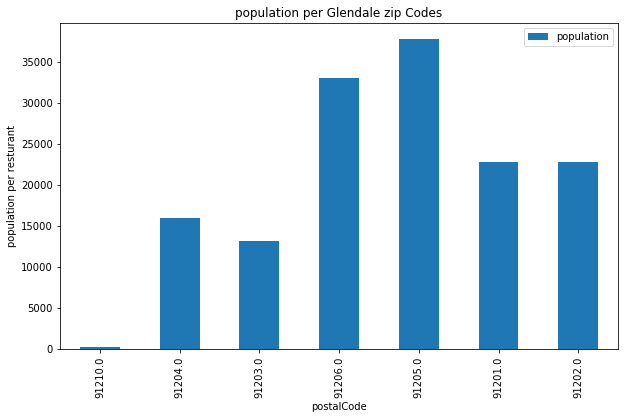

In [89]:
df_Glendale_graph.plot(kind='bar', figsize=(10, 6))

plt.xlabel('postalCode') # add to x-label to the plot
plt.ylabel('population per resturant') # add y-label to the plot
plt.title('population per Glendale zip Codes') # add title to the plot

plt.show()
#create graph for population

In [80]:
df_Glendale_graph2=df_Glendale_combined[['postalCode','population per resturant']].reset_index(drop=True)
df_Glendale_graph2.set_index('postalCode', inplace=True)


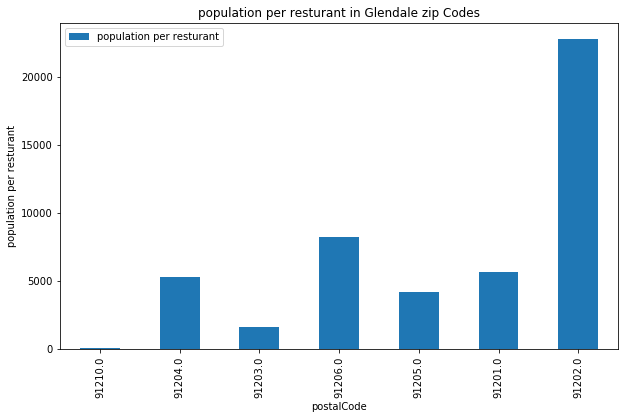

In [81]:
df_Glendale_graph2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('postalCode') # add to x-label to the plot
plt.ylabel('population per resturant') # add y-label to the plot
plt.title('population per resturant in Glendale zip Codes') # add title to the plot

plt.show()

Step 5: Check trending venues

In [82]:
urltrending = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
resultstrending = requests.get(urltrending).json()
resultstrending

{'meta': {'code': 200, 'requestId': '5db35f9f396de00039e208b1'},
 'response': {'venues': []}}

In [83]:
if len(resultstrending['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = resultstrending['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

trending_venues_df

'No trending venues are available at the moment!'

Step 6: Create new Dataframe only for the zipcode 91202 and those neighboring it: 91203,91201,91207

In [84]:

newframe  = pd.DataFrame()
ziplist = ['91202','91201','91203','91207']
for i in range(len(df_combined2.postalCode)):
    if df_combined2.iloc[i,8] in ziplist:
        newframe = newframe.append(df_combined2.iloc[i,])
    



print(newframe)



                     address          categories  cc      city  count  \
2          722 N Pacific Ave  Mexican Restaurant  US  Glendale   11.0   
6           155 N Brand Blvd  Mexican Restaurant  US  Glendale   11.0   
14         1402 W Kenneth Rd  Mexican Restaurant  US  Glendale   11.0   
15         901 Glenoaks Blvd          Taco Place  US  Glendale   11.0   
24          101 N Brand Blvd  Italian Restaurant  US  Glendale   11.0   
25      1900 W Glenoaks Blvd       Deli / Bodega  US  Glendale   11.0   
26          525 N Brand Blvd                Food  US  Glendale   11.0   
27  1309 1/2 W Glenoaks Blvd         Pizza Place  US  Glendale   11.0   
32          209 W Wilson Ave     Thai Restaurant  US  Glendale   13.0   
34          213 W Wilson Ave     Thai Restaurant  US  Glendale   13.0   
36      303 1/2 N Brand Blvd     Thai Restaurant  US  Glendale   13.0   
40   818 N Pacific Ave Ste D     Thai Restaurant  US  Glendale   13.0   
41        1100 N Pacific Ave     Thai Restaurant  U

In [85]:
newframe.head(10)

,address,categories,cc,city,count,country,countzip,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,rankings,state,type
2,722 N Pacific Ave,Mexican Restaurant,US,Glendale,11.0,United States,8.0,at 134 Fwy,2139.0,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,"[{'label': 'display', 'lat': 34.15707381010225...",34.157074,-118.263727,Acapulco Mexican Restaurant,91203,8.4,CA,Mexican
6,155 N Brand Blvd,Mexican Restaurant,US,Glendale,11.0,United States,8.0,NaN,865.0,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,"[{'label': 'display', 'lat': 34.14795064352478...",34.147951,-118.255294,Chipotle Mexican Grill,91203,7.6,CA,Mexican
14,1402 W Kenneth Rd,Mexican Restaurant,US,Glendale,11.0,United States,4.0,NaN,4384.0,"[1402 W Kenneth Rd, Glendale, CA 91201, United...",506c928de4b03bdbe5c1999b,"[{'label': 'display', 'lat': 34.17252126605702...",34.172521,-118.279397,Mi Corazon Mexican Restaurant,91201,7.9,CA,Mexican
15,901 Glenoaks Blvd,Taco Place,US,Glendale,11.0,United States,4.0,at Highland Ave,3200.0,"[901 Glenoaks Blvd (at Highland Ave), Glendale...",512fbacae4b0b6aec4b2af7c,"[{'label': 'display', 'lat': 34.16128578166390...",34.161286,-118.274890,Ara's Tacos Mexican Grill,91201,7.2,CA,Mexican
24,101 N Brand Blvd,Italian Restaurant,US,Glendale,11.0,United States,8.0,btwn Wilson & Broadway,816.0,"[101 N Brand Blvd (btwn Wilson & Broadway), Gl...",4a9dc82df964a5205f3920e3,"[{'label': 'display', 'lat': 34.14728815485925...",34.147288,-118.255310,Olive Garden,91203,6.7,CA,Italian
25,1900 W Glenoaks Blvd,Deli / Bodega,US,Glendale,11.0,United States,4.0,NaN,5421.0,"[1900 W Glenoaks Blvd, Glendale, CA 91201, Uni...",4f32287819836c91c7bbe410,"[{'label': 'display', 'lat': 34.173885, 'lng':...",34.173885,-118.293598,Tony's Italian Delicatessen,91201,na,CA,Italian
26,525 N Brand Blvd,Food,US,Glendale,11.0,United States,8.0,NaN,1441.0,"[525 N Brand Blvd, Glendale, CA 91203, United ...",4f326bfe19836c91c7d63b3e,"[{'label': 'display', 'lat': 34.154244, 'lng':...",34.154244,-118.255190,Milanos Cucina Italiana,91203,na,CA,Italian
27,1309 1/2 W Glenoaks Blvd,Pizza Place,US,Glendale,11.0,United States,4.0,btw Rosedale Ave & Newby St,4166.0,[1309 1/2 W Glenoaks Blvd (btw Rosedale Ave & ...,4b8f1cccf964a520a74933e3,"[{'label': 'display', 'lat': 34.16682829558981...",34.166828,-118.282967,Nino's Pizza,91201,na,CA,Italian
32,209 W Wilson Ave,Thai Restaurant,US,Glendale,13.0,United States,8.0,at Orange St.,984.0,"[209 W Wilson Ave (at Orange St.), Glendale, C...",4b609f41f964a520c8f029e3,"[{'label': 'display', 'lat': 34.14806611952763...",34.148066,-118.256894,Tep Thai,91203,6.5,CA,Thai
34,213 W Wilson Ave,Thai Restaurant,US,Glendale,13.0,United States,8.0,NaN,1003.0,"[213 W Wilson Ave, Glendale, CA 91203, United ...",4a3454aef964a520159c1fe3,"[{'label': 'display', 'lat': 34.1481697484602,...",34.148170,-118.257064,Kozy Corner Thai Cuisine,91203,7.3,CA,Thai


In [86]:
newframe['count'] = newframe.groupby('type')['type'].transform('count')
newframe.groupby('type')['type']
newframe
#add count by type

,address,categories,cc,city,count,country,countzip,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,rankings,state,type
2,722 N Pacific Ave,Mexican Restaurant,US,Glendale,4,United States,8.0,at 134 Fwy,2139.0,"[722 N Pacific Ave (at 134 Fwy), Glendale, CA ...",4a91b6ccf964a5207f1b20e3,"[{'label': 'display', 'lat': 34.15707381010225...",34.157074,-118.263727,Acapulco Mexican Restaurant,91203,8.4,CA,Mexican
6,155 N Brand Blvd,Mexican Restaurant,US,Glendale,4,United States,8.0,NaN,865.0,"[155 N Brand Blvd, Glendale, CA 91203, United ...",55b40cad498edddae42f7ac3,"[{'label': 'display', 'lat': 34.14795064352478...",34.147951,-118.255294,Chipotle Mexican Grill,91203,7.6,CA,Mexican
14,1402 W Kenneth Rd,Mexican Restaurant,US,Glendale,4,United States,4.0,NaN,4384.0,"[1402 W Kenneth Rd, Glendale, CA 91201, United...",506c928de4b03bdbe5c1999b,"[{'label': 'display', 'lat': 34.17252126605702...",34.172521,-118.279397,Mi Corazon Mexican Restaurant,91201,7.9,CA,Mexican
15,901 Glenoaks Blvd,Taco Place,US,Glendale,4,United States,4.0,at Highland Ave,3200.0,"[901 Glenoaks Blvd (at Highland Ave), Glendale...",512fbacae4b0b6aec4b2af7c,"[{'label': 'display', 'lat': 34.16128578166390...",34.161286,-118.274890,Ara's Tacos Mexican Grill,91201,7.2,CA,Mexican
24,101 N Brand Blvd,Italian Restaurant,US,Glendale,4,United States,8.0,btwn Wilson & Broadway,816.0,"[101 N Brand Blvd (btwn Wilson & Broadway), Gl...",4a9dc82df964a5205f3920e3,"[{'label': 'display', 'lat': 34.14728815485925...",34.147288,-118.255310,Olive Garden,91203,6.7,CA,Italian
25,1900 W Glenoaks Blvd,Deli / Bodega,US,Glendale,4,United States,4.0,NaN,5421.0,"[1900 W Glenoaks Blvd, Glendale, CA 91201, Uni...",4f32287819836c91c7bbe410,"[{'label': 'display', 'lat': 34.173885, 'lng':...",34.173885,-118.293598,Tony's Italian Delicatessen,91201,na,CA,Italian
26,525 N Brand Blvd,Food,US,Glendale,4,United States,8.0,NaN,1441.0,"[525 N Brand Blvd, Glendale, CA 91203, United ...",4f326bfe19836c91c7d63b3e,"[{'label': 'display', 'lat': 34.154244, 'lng':...",34.154244,-118.255190,Milanos Cucina Italiana,91203,na,CA,Italian
27,1309 1/2 W Glenoaks Blvd,Pizza Place,US,Glendale,4,United States,4.0,btw Rosedale Ave & Newby St,4166.0,[1309 1/2 W Glenoaks Blvd (btw Rosedale Ave & ...,4b8f1cccf964a520a74933e3,"[{'label': 'display', 'lat': 34.16682829558981...",34.166828,-118.282967,Nino's Pizza,91201,na,CA,Italian
32,209 W Wilson Ave,Thai Restaurant,US,Glendale,5,United States,8.0,at Orange St.,984.0,"[209 W Wilson Ave (at Orange St.), Glendale, C...",4b609f41f964a520c8f029e3,"[{'label': 'display', 'lat': 34.14806611952763...",34.148066,-118.256894,Tep Thai,91203,6.5,CA,Thai
34,213 W Wilson Ave,Thai Restaurant,US,Glendale,5,United States,8.0,NaN,1003.0,"[213 W Wilson Ave, Glendale, CA 91203, United ...",4a3454aef964a520159c1fe3,"[{'label': 'display', 'lat': 34.1481697484602,...",34.148170,-118.257064,Kozy Corner Thai Cuisine,91203,7.3,CA,Thai


In [87]:
newframe = newframe[['type','count']]
newframe.reset_index(drop=True)
newframe =newframe.drop_duplicates(subset='type', keep='first')
newframe.head()
#clean dataframe

,type,count
2,Mexican,4
24,Italian,4
32,Thai,5


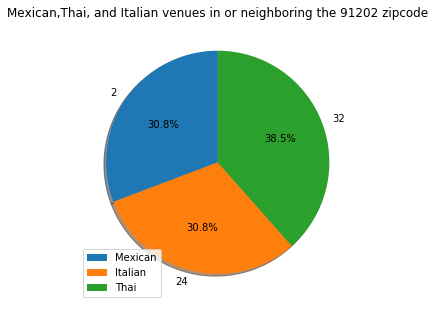

In [88]:

newframe['count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       # add shadow      
                            )
labels = ['Mexican', 'Italian','Thai']

plt.title('Mexican,Thai, and Italian venues in or neighboring the 91202 zipcode')
plt.axis('off') # Sets the pie chart to look like a circle.
plt.legend(labels,loc=3)
plt.show()
#create graph
